In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Check missing Value

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop(columns=["Cabin"], inplace=True) 


In [8]:
df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill Age with median
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)  # Fill Embarked with mode


C:\Users\sahil chouhan\AppData\Local\Temp\ipykernel_7716\1636759365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill Age with median
C:\Users\sahil chouhan\AppData\Local\Temp\ipykernel_7716\1636759365.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survival Analysis

In [11]:

df["Survived"].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

Death= 0

servive= 1

C:\Users\sahil chouhan\AppData\Local\Temp\ipykernel_7716\2026526691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="coolwarm")


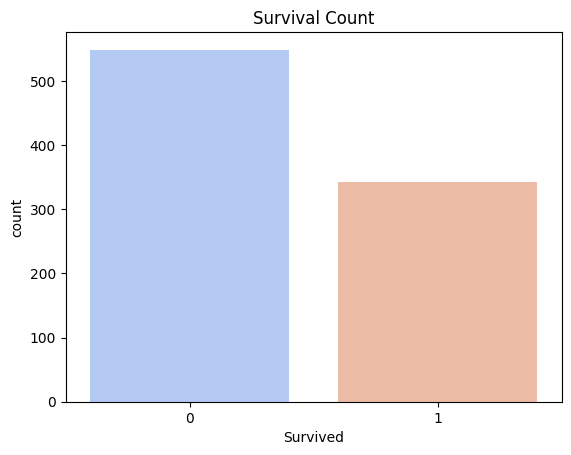

In [12]:

# Bar plot for Survival Count
sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Survival Count")
plt.show()


In [13]:


# Survival rate calculation
male_survival = df[df["Sex"] == 0]["Survived"].mean() * 100
female_survival = df[df["Sex"] == 1]["Survived"].mean() * 100

print(f"Male Survival Rate: {male_survival:.2f}%")
print(f"Female Survival Rate: {female_survival:.2f}%")

# Fare insights
low_fare_survival = df[df["Fare"] < df["Fare"].median()]["Survived"].mean() * 100
high_fare_survival = df[df["Fare"] >= df["Fare"].median()]["Survived"].mean() * 100

print(f"Low Fare Passenger Survival Rate: {low_fare_survival:.2f}%")
print(f"High Fare Passenger Survival Rate: {high_fare_survival:.2f}%")


Male Survival Rate: nan%
Female Survival Rate: nan%
Low Fare Passenger Survival Rate: 25.23%
High Fare Passenger Survival Rate: 51.22%


C:\Users\sahil chouhan\AppData\Local\Temp\ipykernel_7716\4079772052.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, palette="viridis")


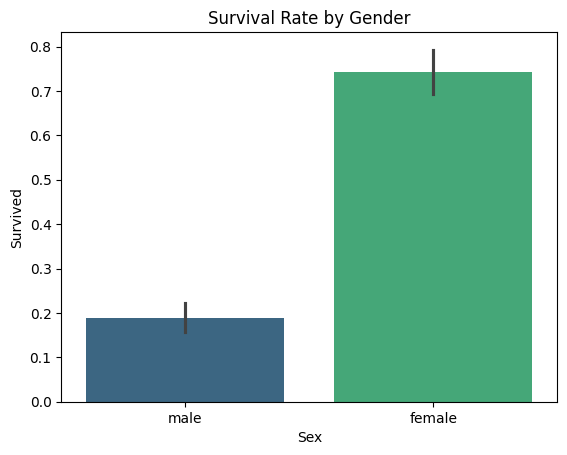

In [14]:

sns.barplot(x="Sex", y="Survived", data=df, palette="viridis")
plt.title("Survival Rate by Gender")
plt.show()


Class-Wise survival rate

In [15]:

df.groupby("Pclass")["Survived"].mean()




Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

C:\Users\sahil chouhan\AppData\Local\Temp\ipykernel_7716\4120744556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="cool")


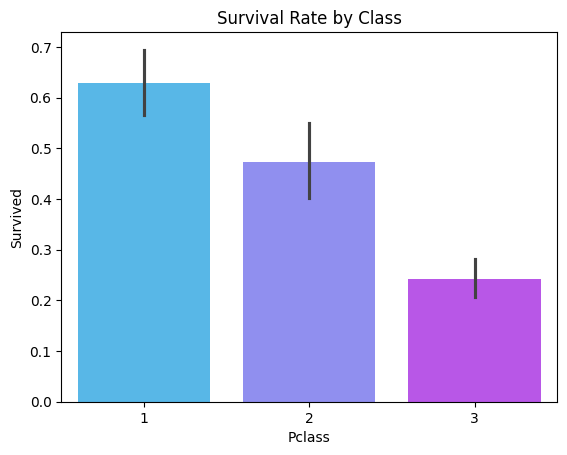

In [16]:
# Bar plot for class-wise survival
sns.barplot(x="Pclass", y="Survived", data=df, palette="cool")
plt.title("Survival Rate by Class")
plt.show()


Age Distribution

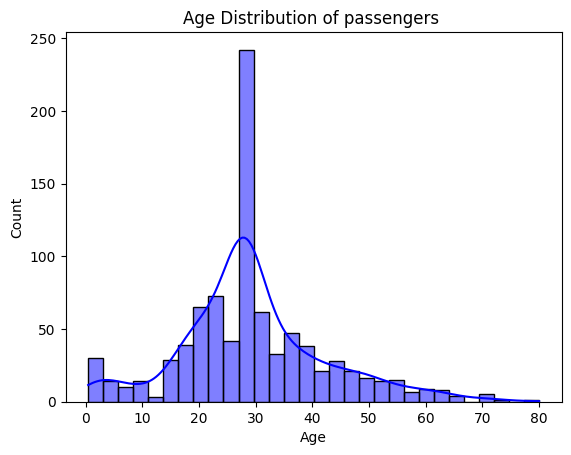

In [17]:
plt.Figure(figsize=(8,5))
sns.histplot(df["Age"],bins=30 , kde= True ,color="blue")
plt.title("Age Distribution of passengers ")

plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Male  V/S  Female passengers  

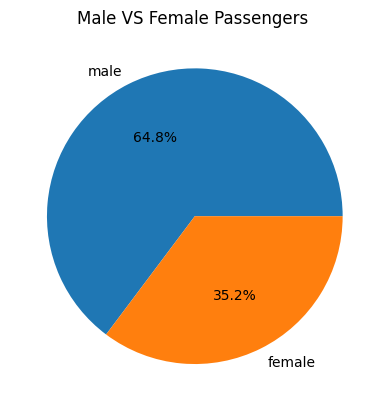

In [18]:
plt.Figure(figsize=(6,6))
df["Sex"].value_counts().plot.pie(autopct="%1.1f%%", color=["lightblue", "pink"])
plt.title("Male VS Female Passengers ")
plt.ylabel ("")
plt.show()

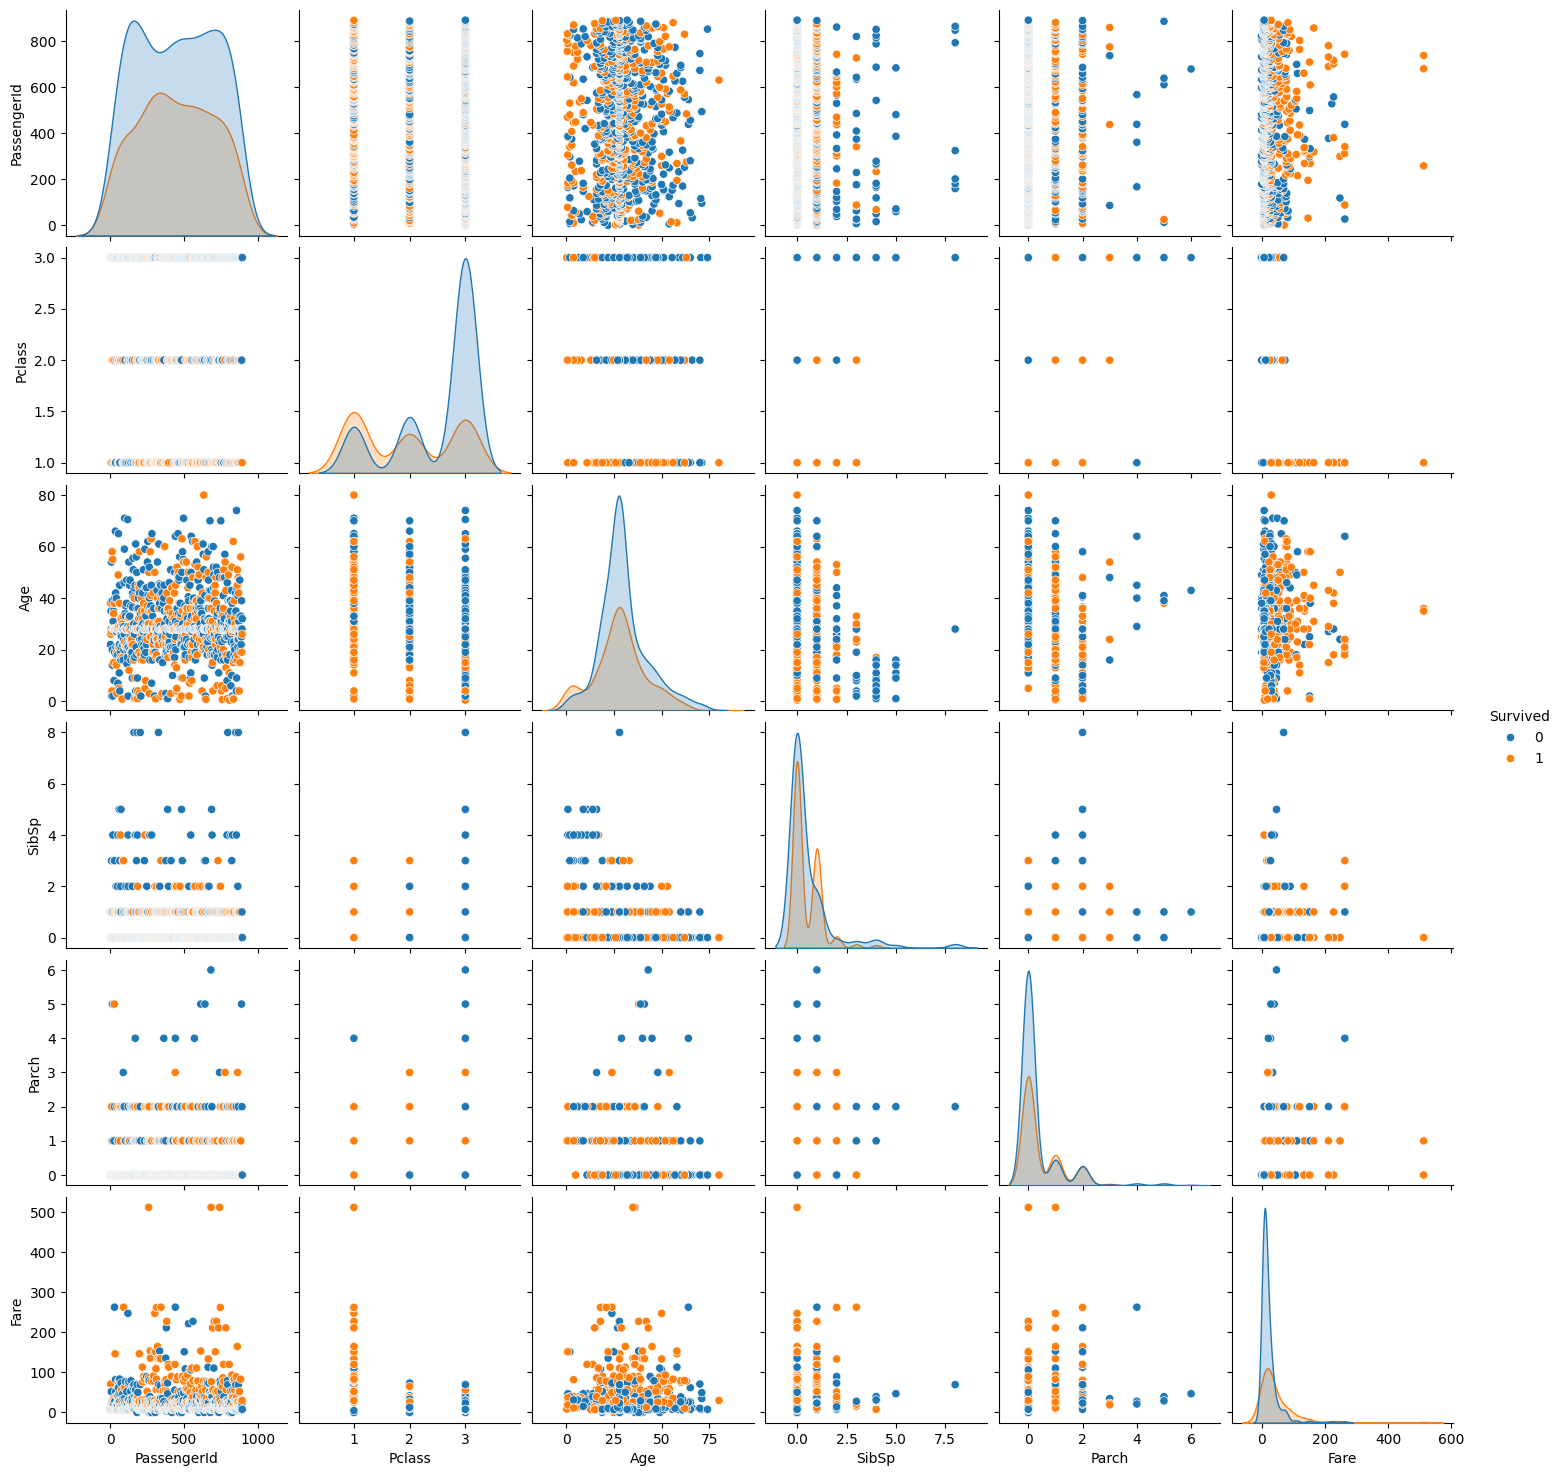

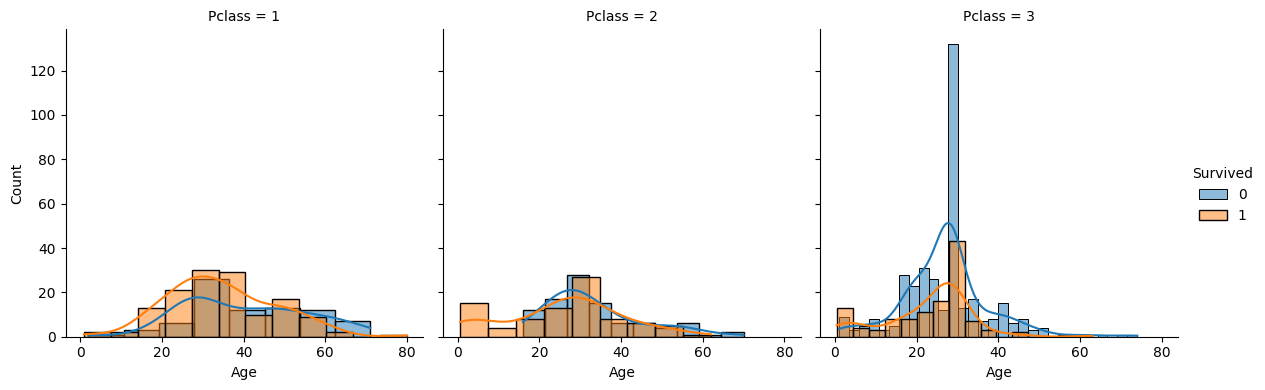

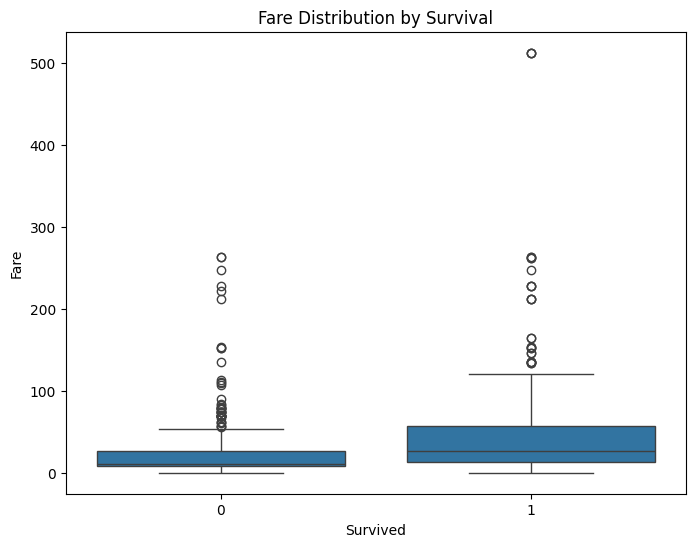

In [19]:

# Pairplot to see feature relationships
sns.pairplot(df, hue="Survived")
plt.show()

# FacetGrid for Age Distribution across classes
g = sns.FacetGrid(df, col="Pclass", hue="Survived", height=4)
g.map(sns.histplot, "Age", kde=True)
g.add_legend()

# Boxplot for Fare Distribution by Survival
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare Distribution by Survival")
plt.show()


Observations 📝
* Higher class passengers (Pclass 1) had a better survival rate.
* Young children had a higher survival probability.
* People who paid higher fares had a greater chance of survival.

Age  V/S  Survival

C:\Users\sahil chouhan\AppData\Local\Temp\ipykernel_7716\204044030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y="Age", data=df, palette="muted")


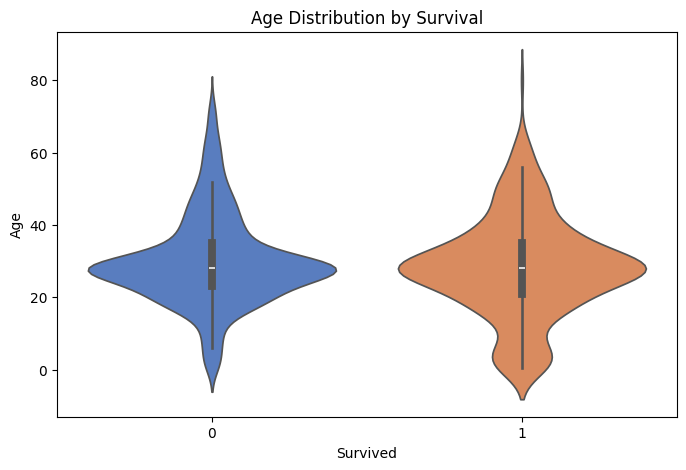

In [20]:
# Violin plot for Age vs Survival
plt.figure(figsize=(8,5))
sns.violinplot(x="Survived", y="Age", data=df, palette="muted")
plt.title("Age Distribution by Survival")
plt.show()



In [21]:

df.to_csv("titanic_cleaned_final.csv", index=False, header=True)  
print("Final cleaned dataset saved successfully!")


Final cleaned dataset saved successfully!


Summary of the Titanic Data Analysis Project 🚢📊

* Data Preprocessing & Cleaning 

*  Exploratory Data Analysis(EDA)

*  Data Visualization 

*  Feature Engineering 
